# Cumbica neighborhood example

Example notebook with regards initial implementation of OSMnx tool over an important neighborhood of the city of Guarulhos, namely Cumbica. Below will be described following analysis:
* Street Orientation Problem
* Node Centrality Evaluation
* Basic statistics of your street network


**Author**: Guilherme Fernandes Alves (https://github.com/Gui-FernandesBR)

References: https://github.com/gboeing/osmnx-examples

## Setting up the analysis

### Installing required packages

In [1]:
%pip install osmnx matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.7 MB/s 
     |████████████████████████████████| 13.1 MB 14.6 MB/s 
     |████████████████████████████████| 93 kB 2.1 MB/s 
     |████████████████████████████████| 6.3 MB 44.4 MB/s 
     |████████████████████████████████| 1.0 MB 51.6 MB/s 
     |████████████████████████████████| 91 kB 6.4 MB/s 
     |████████████████████████████████| 87 kB 5.3 MB/s 
     |████████████████████████████████| 87 kB 6.4 MB/s 
     |████████████████████████████████| 87 kB 6.2 MB/s 
     |████████████████████████████████| 87 kB 6.3 MB/s 
     |████████████████████████████████| 87 kB 5.5 MB/s 
     |████████████████████████████████| 84 kB 1.9 MB/s 
     |████████████████████████████████| 1.0 MB 57.2 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB

### Improve matplotlib plots

In [5]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

### Import required packages

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import osmnx as ox
import pandas as pd

In [7]:
ox.config(log_console=True, use_cache=False)
ox.__version__

'0.11.4'

## Running the analysis

### Load desired geometry

In [8]:
# Load "Cumbica" geometry by using default string name key
# The 'drive' option indicates that only drivable roads will be loaded
cumbica = ox.graph_from_place('Cumbica, Guarulhos, São Paulo, Brasil', 
                              network_type='drive')

# Additional method to evaluate compass bearings for every edge in the file
cumbica = ox.add_edge_bearings(cumbica)

/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed 

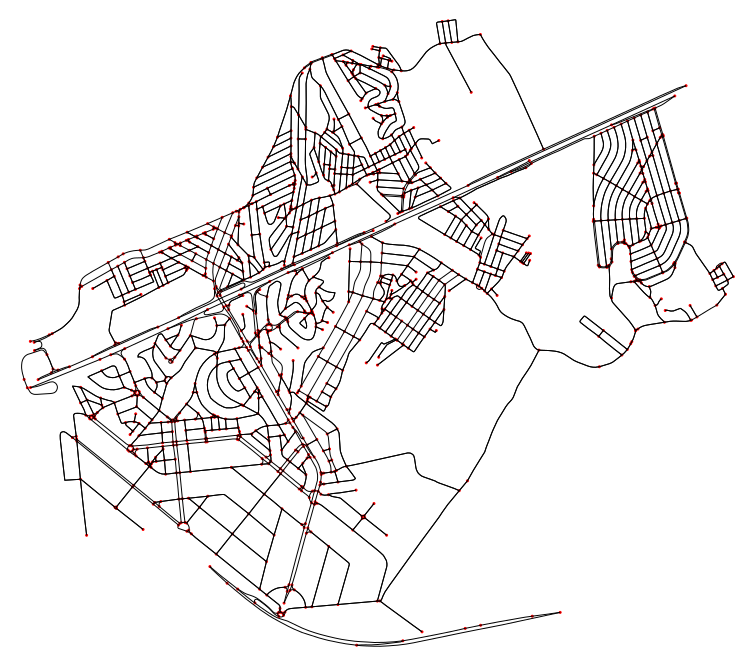

(<Figure size 1070.02x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f303f4f0650>)

In [9]:
# Plot the geometry we just loaded in previous cell
ox.plot_graph(cumbica, 
              fig_height=12,
              bgcolor='white', 
              node_color='red', 
              node_size=4, 
              node_alpha=None, 
              node_edgecolor='red', 
              node_zorder=1, 
              edge_color='black', 
              edge_linewidth=1, 
              edge_alpha=None, 
              show=True, 
              close=False, 
              save=False, 
              dpi=600, 
              bbox=None)

### Perform street orientation analysis

In [10]:
# Calculate edge bearings and visualize their frequency
bearings = []
for u, v, k, dt in cumbica.edges(keys=True, data=True):
    try: 
        bearings.append((dt['bearing']))
    except:
        continue

# Convert bearings list to a pandas data frame
bearings = pd.Series(bearings)

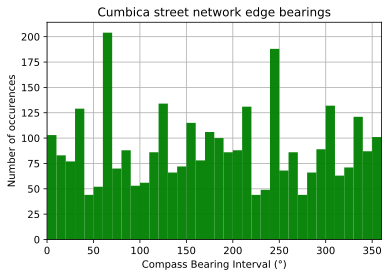

In [11]:
# Generate linear projection histogram
# Each bin represents a 360 / 36 = 10° interval

fig = plt.figure(figsize=(6, 4))
ax = bearings.hist(bins=36, zorder=2, alpha=0.95, color="green")
xlim = ax.set_xlim(0, 360)
plt.xlabel("Compass Bearing Interval (°)")
plt.ylabel("Number of occurrences")
ax.set_title('Cumbica street network edge bearings')

plt.show()

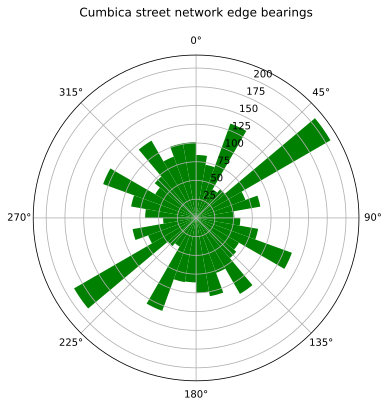

In [12]:
# Generate the same plot but in a polar projection

n = 36
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, 
              bottom=0.0, color='green')
ax.set_title('Cumbica street network edge bearings', y=1.1)

plt.show()

### Visualizing edge and nodes information as a data frame

In [13]:
#convert nodes information to a data frame
df_nodes = ox.graph_to_gdfs(cumbica, edges=False)
df_nodes

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,y,x,osmid,highway,ref,geometry
1662627852,-23.457351,-46.457799,1662627852,NaN,NaN,POINT (-46.45780 -23.45735)
1662627854,-23.457425,-46.470186,1662627854,NaN,NaN,POINT (-46.47019 -23.45742)
7936475159,-23.470766,-46.479191,7936475159,NaN,NaN,POINT (-46.47919 -23.47077)
1662627867,-23.457456,-46.469880,1662627867,NaN,NaN,POINT (-46.46988 -23.45746)
2879131677,-23.478656,-46.471207,2879131677,motorway_junction,NaN,POINT (-46.47121 -23.47866)
...,...,...,...,...,...,...
6250475496,-23.449171,-46.459339,6250475496,NaN,NaN,POINT (-46.45934 -23.44917)
1662627816,-23.457280,-46.460609,1662627816,NaN,NaN,POINT (-46.46061 -23.45728)
1680130027,-23.462275,-46.476135,1680130027,NaN,NaN,POINT (-46.47613 -23.46227)
1680130041,-23.462274,-46.476441,1680130041,NaN,NaN,POINT (-46.47644 -23.46227)


In [14]:
#convert edges information to a data frame
df_edges = ox.graph_to_gdfs(cumbica, nodes=False)
df_edges

,u,v,key,osmid,name,oneway,highway,length,bearing,geometry,junction,lanes,maxspeed,ref,bridge,access,width
0,1662627852,1662627591,0,477561512,Rua Mombaça,True,residential,157.868,34.766,"LINESTRING (-46.45780 -23.45735, -46.45692 -23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1662627852,1662627750,0,477561513,Passagem Hidrolândia,False,residential,58.535,305.581,"LINESTRING (-46.45780 -23.45735, -46.45827 -23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1662627852,1662627924,0,477561514,Passagem Paramoti,False,residential,59.845,124.379,"LINESTRING (-46.45780 -23.45735, -46.45732 -23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1662627854,1662627876,0,153613907,NaN,True,residential,6.446,124.461,"LINESTRING (-46.47019 -23.45742, -46.47013 -23...",roundabout,NaN,NaN,NaN,NaN,NaN,NaN
4,7936475159,4860145187,0,494226018,Rua Ouro Verde,False,unclassified,52.994,261.833,"LINESTRING (-46.47919 -23.47077, -46.47971 -23...",NaN,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,1680130027,4214652416,0,155612977,Rua Prefeito Olivier Ramos Nogueira,False,unclassified,248.154,143.702,"LINESTRING (-46.47613 -23.46227, -46.47597 -23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3228,1680130027,1680129696,0,155612977,Rua Prefeito Olivier Ramos Nogueira,False,unclassified,78.270,349.273,"LINESTRING (-46.47613 -23.46227, -46.47622 -23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3229,1680130041,1680130027,0,413358258,NaN,False,unclassified,31.233,90.041,"LINESTRING (-46.47644 -23.46227, -46.47613 -23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3230,1680130041,1680130332,0,155612902,Avenida Justino de Maio,False,tertiary,116.711,209.664,"LINESTRING (-46.47644 -23.46227, -46.47650 -23...",NaN,2,NaN,NaN,NaN,NaN,NaN


### Connectivity or centrality analysis

In [15]:
# Evaluate node centrality and create color scale
node_centrality = nx.closeness_centrality(cumbica)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='viridis', start=0, stop=0.8)
df = df.reindex(cumbica.nodes())
nc = df['colors'].tolist()

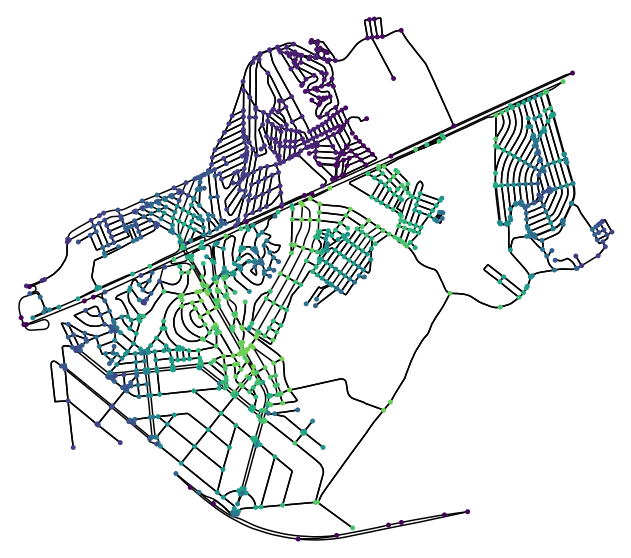

In [16]:
# Create plot for network centrality analysis
# The darker nodes indicates less intersections,
# While the lighter nodes represents more streets connections in that node
fig, ax = ox.plot_graph(cumbica, bgcolor='white', 
                        node_size=25, 
                        node_color=nc, 
                        node_edgecolor='none', 
                        node_zorder=2,
                        edge_color="black", 
                        edge_linewidth=1.5, 
                        edge_alpha=1,
                        fig_height=10)

# TODO: implement color scale plot by using plt.colorbar()

### Create descriptive statistics  

In [17]:
ox.basic_stats(cumbica)

{'circuity_avg': 1.0416544844105466,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 113.95965129950449,
 'edge_length_total': 368317.5929999985,
 'intersection_count': 1244,
 'intersection_density_km': None,
 'k_avg': 4.934351145038168,
 'm': 3232,
 'n': 1310,
 'node_density_km': None,
 'self_loop_proportion': 0.0006188118811881188,
 'street_density_km': None,
 'street_length_avg': 112.76260010060341,
 'street_length_total': 224172.04899999956,
 'street_segments_count': 1988,
 'streets_per_node_avg': 3.0610687022900764,
 'streets_per_node_counts': {0: 0, 1: 66, 2: 5, 3: 1022, 4: 217},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.050381679389312976,
  2: 0.003816793893129771,
  3: 0.7801526717557252,
  4: 0.16564885496183207}}